#### First Workflow
''' Calculating the BMI by drawing the graph, an simple linear sequential workflow graph '''

In [17]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [18]:
# defining state

class BMIState(TypedDict):

      weights_kg : float
      height_m : float
      bmi : float
      category : str

In [19]:
# This is how function is defined

def calculate_bmi(state : BMIState) -> BMIState:

      weight = state['weights_kg']
      height = state['height_m']

      bmi = (weight / (height**2))

      state['bmi'] = round(bmi, 2)

      return state

In [21]:
def lable_bmi(state : BMIState) -> BMIState:

      bmi = state['bmi']

      if bmi < 18.5:
            state["category"] = "Underweight"
      elif 18.5 <= bmi < 25:
            state["category"] = "Normal"
      elif 25 <= bmi < 30:
            state["category"] = "Overweight"
      else:
            state["category"] = "Obese"

      return state

In [22]:
# define your graph

graph = StateGraph(BMIState)


# adding nodes to the graph

graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('lable_bmi', lable_bmi)


# add edges to the graph

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'lable_bmi')
graph.add_edge('lable_bmi', END)


# compile the graph

workflow = graph.compile()

In [23]:
# execute the graph

# final_state = workflow.invoke({'weights_kg' : 48, 'height_m' : 1.74})

# or

initial_state = {'weights_kg' : 48, 'height_m' : 1.74}

final_state = workflow.invoke(initial_state)
final_state

{'weights_kg': 48, 'height_m': 1.74, 'bmi': 15.85, 'category': 'Underweight'}

In [24]:
final_state['bmi']

15.85

In [25]:
final_state['category']

'Underweight'

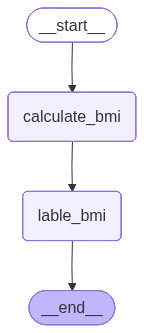

In [26]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

#### LLM Workflow